In [15]:
def next_file(time):
    
    # 將字串轉成整數時間
    hour, minute = map(int, time.split('_'))

    minute += 10
    if minute >= 60:
        minute = 0
        hour += 1
    if hour >= 24:
        hour = 0
    new_time = f"{hour:02d}_{minute:02d}"
    return new_time


In [16]:
import pandas as pd
import os
import json
from collections import defaultdict
import datetime
from datetime import date
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import gc
import time
# 設定中文字型（這裡以 Noto Sans CJK 為例）
plt.rcParams['font.family'] = 'Microsoft JhengHei' 

In [ ]:
current_path = os.getcwd()
folder_path = os.path.dirname(current_path)

In [ ]:
plant_name = ''

一小時

In [24]:
d = date(2025,1,1)

power = []
with open(f"{plant_name}202501.csv", mode="w", newline='', encoding="utf-8") as output:
    writer = csv.writer(output)
    writer.writerow(['date','time','MW'])
for day in range(31):
    file = '00_00'
    for i in range(24):
        hour_power=0
        rd, rf = d, file
        miss = 6
        for j in range(6):
            path = Path(f"{folder_path}/history/{d}/{file}.log")
            if path.exists():
                with open(path, "r", encoding="utf-8") as f:
                    try:
                        log_data = json.load(f)
                        plants = defaultdict(list)
                        for unit in log_data["info"]:
                            if plant_name in unit["name"]:
                                hour_power += float(unit['used'])
                        file = next_file(file)
                        # 處理 data
                    except json.JSONDecodeError:
                        #print(f"⚠️ JSON 解析錯誤，跳過：{d,rf}")
                        file = next_file(file)
                        continue
                    del log_data
            # missing value 
            else:
                miss -= 1
                file = next_file(file)
        if miss == 0:
            #print('miss',d,rf)
            power.append([rd, rf, -1])
        else:
            power.append([rd, rf, round(hour_power,3)])
        if len(power) >= 500:
            with open(f"{plant_name}202501.csv", mode="a", newline='', encoding="utf-8") as output:
                writer = csv.writer(output)
                for write in power:  
                    writer.writerow(write)
            power.clear()
            gc.collect()
    d = d + datetime.timedelta(days=1)
with open(f"{plant_name}202501.csv", mode="a", newline='', encoding="utf-8") as output:
    writer = csv.writer(output)
    for write in power:  
        writer.writerow(write)
    

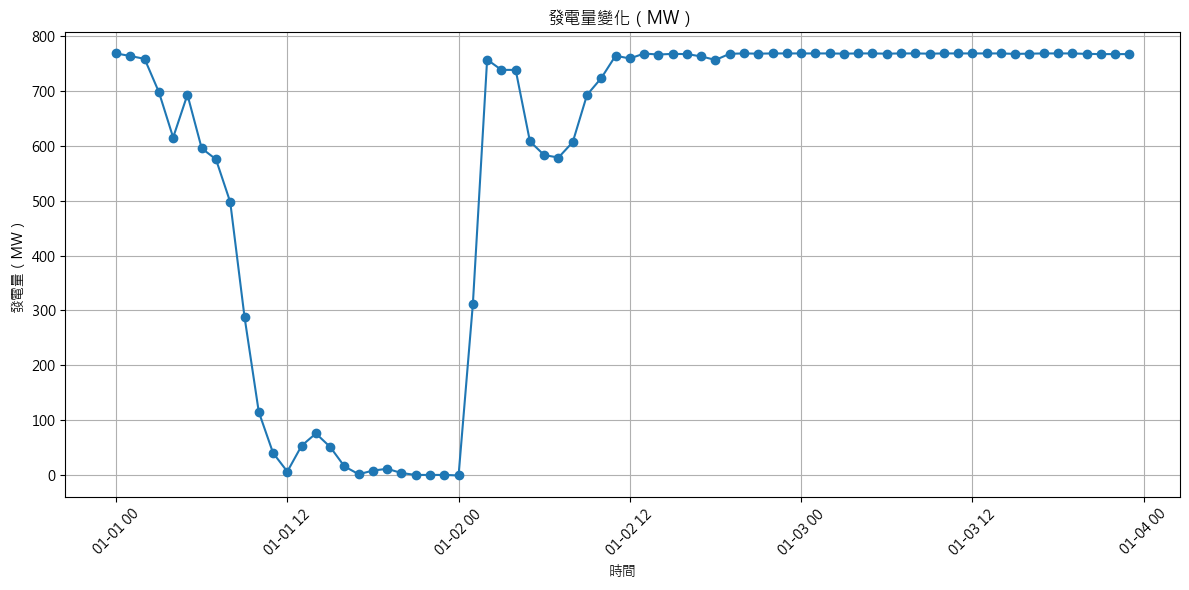

In [ ]:
# 讀取 CSV
df = pd.read_csv(f"{plant_name}202501.csv")

# 將日期欄轉成 datetime（推薦）
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'].str.replace('_', ':'))
df =df.head(72)



